# 서포트 벡터 머신
    - 새로운 데이터가 입력되었을 때 기존 데이터를 활용해 분류하는 방법
    - 패턴 인식, 자료 분석 등을 위한 지도학습 모델로 회귀와 분류 문제 해결에 사용이 되는 알고리즘

- 매개변수(class 생성시 실행되는 생성자 함수의 인자)
    - C
        - 기본값: 1.0
        - 규제의 강도의 역수
        - 숫자 크면 -> 오차를 허용하지 않는다 (과적합 위험)
        - 숫자 작으면 -> 오차를 어느정도 허용(일반화 위험)
    - kernel(커널 함수의 종류)
        - 기본값 : "rdf"
        - 실제의 데이터가 선형이 아닌 경우 커널 함수를 이용하여 데이터를 고차원 공간으로 매핑하여 직선으로 구분을 가능하게 하는 방법
        - "linear" : 선형 SVM
        - "poly" : 다항식 커널
        - 'rbf' : 가우시안 커널(가장 많이 사용)
        - "sigmoid" : 시그모이드 함수 기반
    - gamma
        - 커널 계수
        - 'linear' 제외한 커널이 선택되었을 때 사용
        - 크면 -> 경계가 복잡해짐 (과적합 위험)
        - 작으면 -> 경계가 유연해짐 (일반화 위험)
    - degree
        - 기본값 : 3
        - 다항식 커널의 차수 
        - 비선형 데이터의 패턴을 학습할 수 있게 해주는 변수
    - probability
        - 기본값 : False
        - 확률 출력의 여부 -> True인 경우 predict_proba() 함수를 사용 가능 
        - 학습할 때 속도가 느려짐 
- 주요 속성(학습이 된 후! 나오는 변수들)
    - support_
        - 서포트 벡터의 인덱스의 값
        - 전체의 데이터에서 경계선에 딱 붙어 있는 데이터의 인덱스 값
    - support_vectors_
        - support_가 위치(인덱스)의 값이라면 support_vectors_는 그 값에 해당하는 실제 데이터의 값
    - n_support_
        - 클래스 (컬럼)별 서포트 벡터의 개수
    - coef_
        - 결정 경계의 계수 (linear 커널인 경우에만 사용 가능)

- 매서드
    - fit(x, y): 학습
    - predict(x): 예측
    - predict_proba(x) : 예측 확률 (probability의 값이 True인 경우)
    - decision_function(x) : 결정 함수의 값 (margin과의 거리)
    - score(x, y) : 정확도 평가

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [7]:
df = pd.read_csv("../data_git/data/classification.csv")
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   interest  297 non-null    float64
 2   success   297 non-null    float64
dtypes: float64(3)
memory usage: 7.1 KB


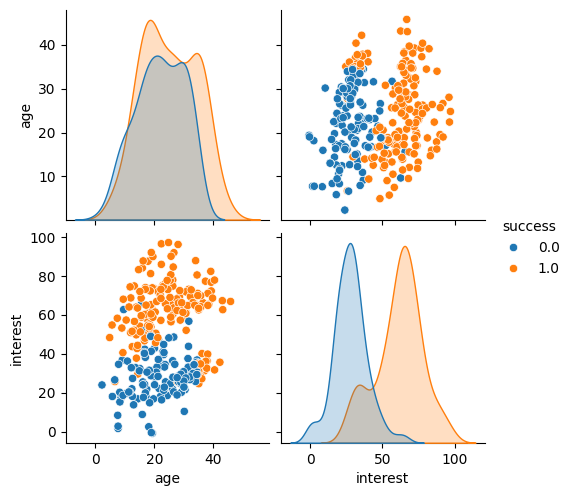

In [9]:
# 데이터 클래스 분포를 그래프로 확인
sns.pairplot(
    data = df,
    hue = 'success'
)

In [11]:
# 데이터의 분할 train, test
x = df[['age', 'interest']].values
y = df['success'].values
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y,
    test_size=0.3, stratify=y,
    random_state=42
)

In [12]:
# 스케일러
# SVM은 각각 특성(컬럼)의 스케일에 매우 민감하기 때문에 스케일링 필요
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [14]:
# 스케일링이 된 데이터를 기준으로 학습하고 평가
clf = SVC(C=0.5)

In [15]:
clf.fit(X_train_sc, Y_train)

,C,0.5
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [16]:
pred = clf.predict(X_test_sc)

cm = confusion_matrix(Y_test, pred)
acc = accuracy_score(Y_test, pred)
prc = precision_score(Y_test, pred)
rcll = recall_score(Y_test, pred)
f1 = f1_score(Y_test, pred)
print("혼동행렬 : ", cm)
print("정확도 : ", round(acc, 2))
print("정밀도 : ", round(prc, 2))
print("재현율 : ", round(rcll, ))
print("F1 : ", round(f1*100, 2))

혼동행렬 :  [[36  3]
 [ 4 47]]
정확도 :  0.92
정밀도 :  0.94
재현율 :  1
F1 :  93.07


In [21]:
# 스케일링이 되지 않은 원본의 데이터를 이용하여 학습 평가 지표 출력

clf2 = SVC(C=0.5)
clf2.fit(X_train, Y_train)
pred2 = clf2.predict(X_test)

cm_2 = confusion_matrix(Y_test, pred2)
acc_2 = accuracy_score(Y_test, pred2)
prc_2 = precision_score(Y_test, pred2)
rcll_2 = recall_score(Y_test, pred2)
f1_2 = f1_score(Y_test, pred2)
print("혼동행렬 : ", cm_2)
print("정확도 : ", round(acc_2, 2))
print("정밀도 : ", round(prc_2, 2))
print("재현율 : ", round(rcll_2, ))
print("F1 : ", round(f1_2*100, 2))

혼동행렬 :  [[36  3]
 [ 9 42]]
정확도 :  0.87
정밀도 :  0.93
재현율 :  1
F1 :  87.5


In [22]:
# 분류 분석을 통하여 확인
from sklearn.svm import LinearSVC

C -> 1인 경우 support_vector의 개수는 100
C -> 500인 경우 support_vector의 개수는 97


/var/folders/v0/r6b3g15j6gd1x8947g8ly2qr0000gn/T/ipykernel_38488/2009459366.py:41: UserWarning: The following kwargs were not used by contour: 'linesytles'
  plt.contour(xx, yy, z, colors='k', levels=[-1, 0, 1],
/var/folders/v0/r6b3g15j6gd1x8947g8ly2qr0000gn/T/ipykernel_38488/2009459366.py:41: UserWarning: The following kwargs were not used by contour: 'linesytles'
  plt.contour(xx, yy, z, colors='k', levels=[-1, 0, 1],


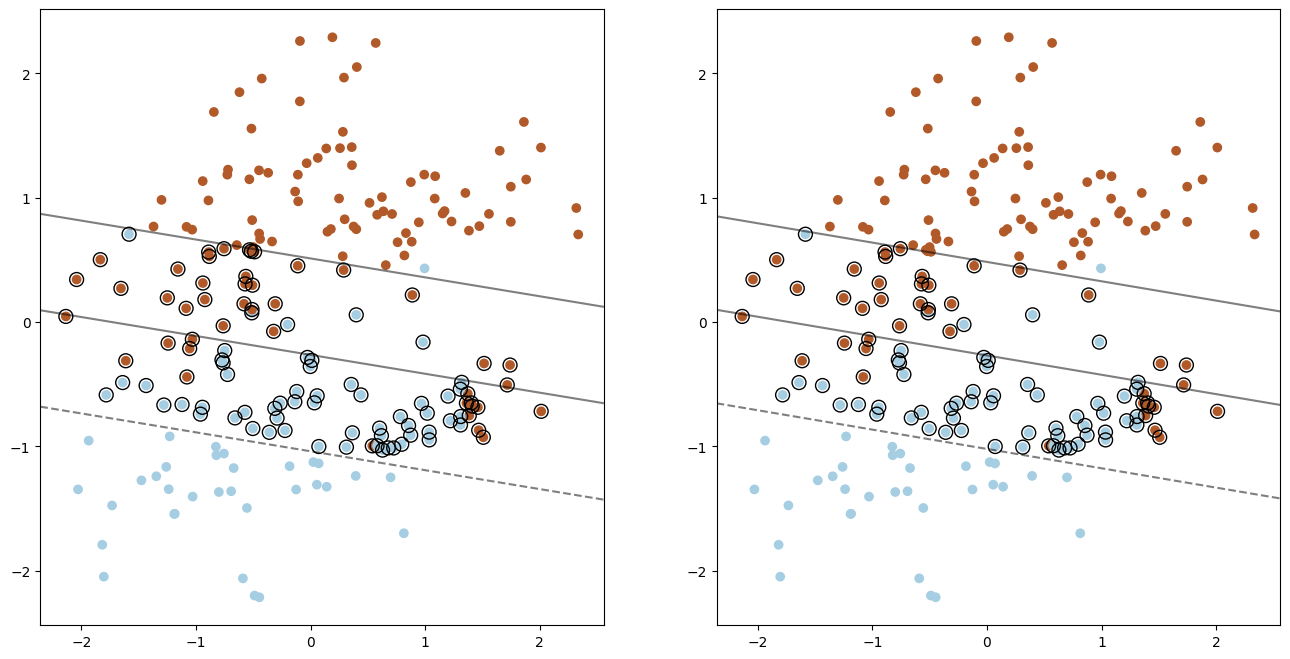

In [45]:
# 마진 영억을 그래프로 표시
plt.figure(figsize=(16, 8))
for i, c in enumerate([1, 500]):
    # i에서는 [1, 500] 리스트의 위치 값이 순차적으로 대입
    # c에는 [1, 500] 리스트의 값들이 순차적으로 대입
    clf = LinearSVC(C = c, random_state=42)
    clf.fit(X_train_sc, Y_train)
    
    # decision_function() -> 경계선과의 거리를 의미
    decision = clf.decision_function(X_train_sc)

    # margin(-1 <= decision_function() <= 1)의 데이터를 support_vector로 간주
    support_vector_indices = np.where(
        np.abs(decision)<= 1+1e-15
    )[0]
    support_vector = X_train_sc[support_vector_indices]
    # support_ventor의 개수를 출력
    print(f"C -> {c}인 경우 support_vector의 개수는 {len(support_vector)}")

    # subplot을 이용하여 1행 2열의 영역을 생성
    plt.subplot(1, 2, i+1)

    # 학습 데이터의 산점도 그래프 생성
    plt.scatter(X_train_sc[:, 0], X_train_sc[:, 1], c=Y_train, cmap = plt.cm.Paired
)

    # 현재 좌표축의 정보를 로드
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 격자(결정 경계) 추가
    xx,yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 500),
        np.linspace(ylim[0], ylim[1], 500))
    z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    
    # 각 격자점에 대한 deicision fucion의 값을 지정하고 행렬의 크기를 xx와 같게 변환
    z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contour(xx, yy, z, colors='k', levels=[-1, 0, 1],
                alpha = 0.5, linesytles = ['--', '-', '--']
        )
    plt.scatter(
            support_vector[:, 0], support_vector[:, 1], s = 100, linewidths=1, facecolors = 'none', edgecolors='k'
        )
plt.show()


# SVR(Support Vector Refression)
- 서포트 벡터 회귀 분석
- 입실론 튜브 안에 들어오는 데이터는 오차로 보지 않는다.
- 튜브 밖의 데이터만 패널티를 부여하는 방식

- 매개변수
    - kernel
        - 커널 함수 선택
        -  linear
            - 사용 매개변수 : C, epsilron,
            - 고차원 희소데이터, 선형 데이터셋
        - rbf
            - 사용 매개변수 : C, epsilron, gamma
            - 범용, 성능이 우수
        - poly
            - 사용 매개변수 : C, epsilron, degree, gamma
            - 다항적 경계가 자연스러운 데이터
        - sigmoid
            - 사용 매개변수 : C, epsilron, gamma
            - 특수한 경우에 이용, 신경망과 유사 데이터 (연구용 데이터)
    - epsilron : 오차 허용의 폭
    - gamma : 데이터 간 영향의 범위

- 속성
    - dual_coef : 쌍대문제의 알파 값들
    - coef: 회귀계수

In [53]:
# 랜덤 데이터를 생성
x = np.sort(
    5 * np.random.rand(40, 1), axis = 0
)
y = np.sin(x).ravel()
print(x, y)

[[0.02898693]
 [0.05601236]
 [0.09287773]
 [0.28777865]
 [0.52364288]
 [0.60073891]
 [0.77259314]
 [0.79242672]
 [0.96715304]
 [1.11678116]
 [1.3048567 ]
 [1.36626895]
 [1.46322704]
 [1.48414063]
 [1.6949437 ]
 [2.1097505 ]
 [2.12019837]
 [2.4113277 ]
 [2.46519818]
 [2.53944414]
 [3.17573551]
 [3.23076472]
 [3.42019049]
 [3.48964489]
 [3.60211297]
 [3.68478344]
 [3.78535713]
 [3.80580654]
 [3.8462556 ]
 [3.865182  ]
 [3.91801118]
 [3.96465756]
 [4.09801029]
 [4.2752429 ]
 [4.29491834]
 [4.36853538]
 [4.48325387]
 [4.69674147]
 [4.82893713]
 [4.87875954]] [ 0.02898287  0.05598308  0.09274426  0.28382293  0.5000382   0.56525216
  0.69799454  0.71205921  0.82327299  0.89869339  0.96484598  0.97915708
  0.99422     0.99624774  0.99230361  0.85824591  0.85283691  0.66706705
  0.62598538  0.56641442 -0.03413622 -0.08905394 -0.27500782 -0.34106748
 -0.44441427 -0.51687014 -0.60021067 -0.61644034 -0.64777709 -0.66207891
 -0.7007288  -0.73323333 -0.81713176 -0.90596357 -0.91411739 -0.94146254
 

In [49]:
# 타깃 데이터(종속 변수에 노이즈 추가)
y[::5] += 3*(0.5-np.random.rand(8))
print(y[:10])

[0.31201202 0.03388241 0.21330912 0.3368415  0.41412952 1.69066467
 0.74892564 0.77080205 0.77412401 0.85033749]


In [54]:
# 회귀 모델에 (rbf, 선형, 다항)
from sklearn.svm import SVR

In [60]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto', epsilon=0.1)
svr_poly = SVR(kernel='poly', C=100, degree=3, gamma='auto', epsilon=0.1, coef0=1)

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [62]:
# 학습
svr_rbf.fit(x, y)
svr_lin.fit(x, y)
svr_poly.fit(x, y)

,kernel,'poly'
,degree,3
,gamma,'auto'
,coef0,1
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [64]:
# 예측 데이터를 생성
pred_rbf = svr_rbf.predict(x)
pred_lin = svr_lin.predict(x)
pred_poly = svr_poly.predict(x)

In [66]:
# 평가 지표
index = ['RBF', 'Lin', 'Poly']
cols = ['MSE', 'RMSE', 'MAE', 'R2']
result = pd.DataFrame(index = index, columns = cols)
result

,MSE,RMSE,MAE,R2
RBF,NaN,NaN,NaN,NaN
Lin,NaN,NaN,NaN,NaN
Poly,NaN,NaN,NaN,NaN


In [67]:
preds = [pred_rbf, pred_lin, pred_poly]
for pred, i in zip(preds, index):
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)

    result.loc[i, 'MSE'] = mse
    result.loc[i, 'RMSE'] = rmse
    result.loc[i, 'MAE'] = mae
    result.loc[i, 'R2'] = r2


In [68]:
result

,MSE,RMSE,MAE,R2
RBF,0.005963,0.077219,0.072087,0.988658
Lin,0.192047,0.438232,0.315413,0.634708
Poly,0.005586,0.07474,0.068588,0.989375


# 연습
- csv 폴더 안에 boston 데이터를 로드
- 독립, 종속 변수로 데이터를 나눠준다.
- train, test를 8:2의 비율로 분할
- RBF, Lin, Poly 모델을 생성
- train 데이터를 학습
- test 데이터를 이용하여 예측
- 각각 모델의 평가 지표를 생성하여 우수한 kernel 함수를 선택

In [89]:
boston = pd.read_csv('../data_git/csv/boston.csv')

In [90]:
x = boston.drop('Price', axis = 1)
y = boston['Price']

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)

In [94]:
svr_rbf = SVR(kernel='rbf', C = 100, gamma = 0.1, epsilon = 0.1)
svr_lin = SVR(kernel='linear', C = 100, gamma = 'auto', epsilon = 0.1)
svr_poly = SVR(kernel='poly', C = 100, degree = 3, gamma = 'auto', epsilon = 0.1, coef0 = 1)

In [95]:
svr_rbf.fit(X_train, Y_train)
svr_lin.fit(X_train, Y_train)
svr_poly.fit(X_train, Y_train)

In [86]:
# 예측 데이터를 생성
pred_rbf = svr_rbf.predict(X_test)
pred_lin = svr_lin.predict(X_test)
pred_poly = svr_poly.predict(X_test)

In [ ]:
# 평가 지표
index = ['RBF', 'Lin', 'Poly']
cols = ['MSE', 'RMSE', 'MAE', 'R2']
result = pd.DataFrame(index = index, columns = cols)
result

In [ ]:
preds = [pred_rbf, pred_lin, pred_poly]
for pred, i in zip(preds, index):
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)

    result.loc[i, 'MSE'] = mse
    result.loc[i, 'RMSE'] = rmse
    result.loc[i, 'MAE'] = mae
    result.loc[i, 'R2'] = r2